<a href="https://colab.research.google.com/github/Anu-Oluwa-Po/HandWritten-Digits-Prediction/blob/main/Deep_Learning(Handwritten_Digit_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Conv2D #feature extraction
from tensorflow.keras.layers import MaxPool2D #Dimensionality reduction
from tensorflow.keras.layers import Flatten #dimension compatibility
from tensorflow.keras.layers import Dropout #prevent overfitting

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [3]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


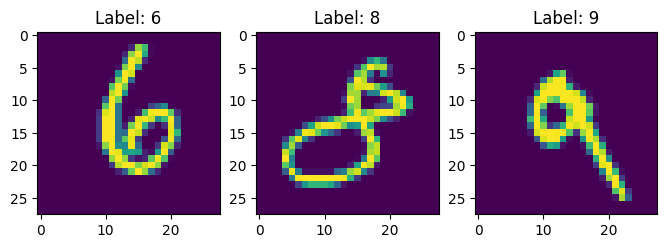

In [4]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[2300])
plt.title("Label: {}".format(train_labels[2300]))

plt.subplot(1,3,2)
plt.imshow(train_images[34500])
plt.title("Label: {}".format(train_labels[34500]))

plt.subplot(1,3,3)
plt.title("Label: {}".format(test_labels[7]))
plt.imshow(test_images[7])

plt.show()

In [5]:
train_images = train_images.reshape([train_images.shape[0], train_images.shape[1], train_images.shape[2], 1])
test_images = test_images.reshape([test_images.shape[0], test_images.shape[1], test_images.shape[2], 1])

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#Rescaling - improve training performance
#train_images = train_images.astype('float32')/ 255.0
#test_images = test_images.astype('float32')/ 255.0

In [7]:
input_shape = train_images.shape[1:]
n_class = len(np.unique(train_labels))

In [8]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 157ms/step - accuracy: 0.7004 - loss: 0.9069
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 145ms/step - accuracy: 0.9399 - loss: 0.1988
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.9562 - loss: 0.1464
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.9625 - loss: 0.1262
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 139ms/step - accuracy: 0.9675 - loss: 0.1078
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 134ms/step - accuracy: 0.9690 - loss: 0.1013
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - accuracy: 0.9723 - loss: 0.0908
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 143ms/step - accuracy: 0.9758 - loss: 0.0779
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.9752 - loss: 0.0784
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9777 - loss: 0.0709


In [11]:
history

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Conv2D #feature extraction
from tensorflow.keras.layers import MaxPool2D #Dimensionality reduction
from tensorflow.keras.layers import Flatten #dimension compatibility
from tensorflow.keras.layers import Dropout #prevent overfitting
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[2300])
plt.title("Label: {}".form

In [12]:
loss, acc = model.evaluate(test_images, test_labels, verbose = 0)
print("Accuracy:: ", acc)
print("Loss:: ", loss)

Accuracy::  0.9901999831199646
Loss::  0.030289528891444206


In [13]:
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [14]:
y_pred[7]

array([4.1129222e-10, 5.0293648e-11, 1.6273564e-09, 4.5631201e-09,
       8.5849562e-05, 5.2507289e-08, 1.7360785e-10, 5.6334166e-11,
       2.8385311e-05, 9.9988562e-01], dtype=float32)

In [15]:
np.argmax(y_pred[7])

np.int64(9)

In [16]:
test_labels[7]

np.uint8(9)

In [18]:
y_pred[100]

array([7.2411295e-09, 1.7868590e-11, 1.5267398e-13, 3.1514301e-17,
       2.5570814e-09, 2.6617502e-07, 9.9999970e-01, 5.4554691e-19,
       4.2264917e-10, 5.8743911e-16], dtype=float32)

In [19]:
np.argmax(y_pred[100])

np.int64(6)

In [20]:
test_labels[100]

np.uint8(6)

In [21]:
tf.keras.models.save_model(model, 'cnn_model.keras')